#### Name: Eric Lindgren
#### CID: ericlin
#### PSN: 970222-1954

## Neural Network classification

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

Load dataset

inputs: (n_data, pixel_width, pixel_height) = (1797, 8, 8)
                       with labels (n_data) = (1797,)

flattened input, X: (n_inputs, n_features)  = (1797, 64)


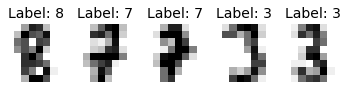

In [2]:
# import 
from sklearn import datasets

# ensure the same random numbers appear every time
np.random.seed(0)

# download MNIST dataset
digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print(f"inputs: (n_data, pixel_width, pixel_height) = {inputs.shape}")
print(f"                       with labels (n_data) = {labels.shape}")


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print(f"\nflattened input, X: (n_inputs, n_features)  = {inputs.shape}")


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {digits.target[random_indices[i]]:1}")

Prepare dataset

In [3]:
from sklearn.model_selection import train_test_split

# ensure the same random numbers appear every time
np.random.seed(0)

train_size = 0.7
test_size = 1 - train_size
X_train, X_test, Y_train, Y_test = train_test_split(inputs, labels, train_size=train_size,
                                                    test_size=test_size)

print(f"Number of training images: {len(X_train):4}")
print(f"Number of test images:     {len(X_test):4}")

Number of training images: 1257
Number of test images:      540


Initialize the network

In [4]:
# initializing our neural network

n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 10

# we make the weights normally distributed using numpy.random.randn

# ensure the same random numbers appear every time
np.random.seed(0)

# weights and bias in the hidden layer
hidden_weights = np.random.randn(n_features, n_hidden_neurons)
hidden_bias = np.zeros(n_hidden_neurons) + 0.01

# weights and bias in the output layer
output_weights = np.random.randn(n_hidden_neurons, n_categories)
output_bias = np.zeros(n_categories) + 0.01

### Task 1: Implement the feed-forward pass

Implement the forward pass as described in the problem description. The activation for layer h is:
$$ z_j = \sum_i^F w_{ji}x_i + b_j = W$$
$$ \vec{z} = W^T\vec{x} + \vec{b}$$

**CORRECT?** Note the transpose on W, which is required the way it is designed (n_features, n_hidden_neurons).

In [5]:
def sigmoid(z):
    '''Sigmoid activation function for hidden layer.'''
    return 1/(1 + np.exp(-z))


def softmax(z):
    '''Softmax activation function for the output layer.'''
    ax=0
    if isinstance(z[0], np.ndarray):
        'Check if a list, if so use matrix version of argmax.'
        ax=1
    return np.exp(z)/((np.exp(z)).sum(axis=ax)).reshape(-1,1)


def feed_forward(X):
    """
    Feed-forward pass.
    Uses hidden_weights, hidden_bias, output_weights, output_bias
    
    Args:
        X (array[float]): input to the neural network

    Returns:
        a_h (array[float]): activation in the hidden layer
        probabilities (array[float]): probabilities of each category
    """
    # First hidden layer
    z_h = X@hidden_weights + hidden_bias.T
    a_h = sigmoid(z_h)
    # Output layer
    z_o = a_h@output_weights + output_bias.T
    probabilities = softmax(z_o)  # Output probabilities
    return a_h, probabilities


# prediction of class label
def predict(X):
    """
    Return a prediction by finding the class with the highest likelihood.

    Args:
        X (array[float]): input to the neural network

    Returns:
        label (integer): index of the category with the highest probability
    """

    a_h, probabilities = feed_forward(X)
    # Modify the code below
    #
    if isinstance(probabilities[0], np.ndarray):
        'Check if a list, if so use matrix version of argmax.'
        class_label = probabilities.argmax(axis=1)  # Returns a number between 0-9 - the index
    else: 
        class_label = probabilities.argmax()
    return class_label

In [6]:
# Test by feeding the input data
# Take a few indices and see what we get out
indices = [3, 23, 1, 64, 4, 2, 11, 8, 7]  # Indices for one of each
for indx in indices:
    X_image = X_train[indx]
    Y_label = Y_train[indx]
    prediction = predict(X_image)
    print(f'For input of a {Y_label} the network outputed a {prediction[0]}. Was this correct? {Y_label==prediction[0]}.')

For input of a 1 the network outputed a 7. Was this correct? False.
For input of a 2 the network outputed a 7. Was this correct? False.
For input of a 3 the network outputed a 6. Was this correct? False.
For input of a 4 the network outputed a 7. Was this correct? False.
For input of a 5 the network outputed a 7. Was this correct? False.
For input of a 6 the network outputed a 6. Was this correct? True.
For input of a 7 the network outputed a 1. Was this correct? False.
For input of a 8 the network outputed a 9. Was this correct? False.
For input of a 9 the network outputed a 7. Was this correct? False.


Hence we see that our network performs rather poorly.

### Task 2: Train the network

In [7]:
# to categorical turns our integer vector into a onehot representation
# we implement it in in numpy
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

Y_train_onehot, Y_test_onehot = to_categorical_numpy(Y_train), to_categorical_numpy(Y_test)

In [8]:
from sklearn.metrics import accuracy_score

def backpropagation(X, Y):
    a_h, probabilities = feed_forward(X)
    # error in the output layer
    error_output = probabilities - Y
    # error in the hidden layer
    error_hidden = np.matmul(error_output, output_weights.T) * a_h * (1 - a_h)
    
    # gradients for the output layer
    output_weights_gradient = np.matmul(a_h.T, error_output)
    output_bias_gradient = np.sum(error_output, axis=0)
    
    # gradient for the hidden layer
    hidden_weights_gradient = np.matmul(X.T, error_hidden)
    hidden_bias_gradient = np.sum(error_hidden, axis=0)

    return output_weights_gradient, output_bias_gradient, hidden_weights_gradient, hidden_bias_gradient

In [9]:
print(f"Accuracy on training data before training: {accuracy_score(predict(X_train), Y_train):.3f}")

Accuracy on training data before training: 0.046


In [10]:
eta = 0.001
alpha = 0.1
iters = 1000
gradient_vector = []  # A vector containing the absolute value and the variance of the gradient to plot in task 4
for i in range(iters):
    # calculate gradients
    dWo, dBo, dWh, dBh = backpropagation(X_train, Y_train_onehot)
    # Add the regularization term gradients to the weights
    dWo += alpha*output_weights # The gradient of the regularizer term with respect to the weights is just \alpha*wij
    dWh += alpha*hidden_weights
    gradient_vector.append([np.abs(dWh).mean(), np.std(dWh)])
    # Finally, update weights and biases
    # Modify the code below
    #
    output_weights -= eta*dWo
    output_bias -= eta*dBo
    hidden_weights -= eta*dWh
    hidden_bias -= eta*dBh
print(f"Accuracy on training data after training: {accuracy_score(predict(X_train), Y_train):.3f}")

Accuracy on training data after training: 0.997


In [11]:
print(output_weights.shape)
print()
print(hidden_weights.shape)

(50, 10)

(64, 50)


### Task 3: Train the network

Accuracy on test data: 0.926
Some wrongly classified images


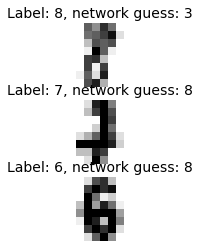

In [12]:
# Calculate the accuracy score on the test data. The accuracy is just the number of correct classifications, 
# divided by the total number of test samples.
# Use accuracy_score function. 
print(f"Accuracy on test data: {accuracy_score(predict(X_test), Y_test):.3f}")

# Plot the first few images that were wrongly classified
nbr_of_images_to_plot = 3
images_plotted = 0
fig, axs = plt.subplots(nbr_of_images_to_plot)
print("Some wrongly classified images")
for idx, x in enumerate(X_test):
    if nbr_of_images_to_plot > images_plotted:
        p = predict(x)
        if not p == Y_test[idx]:
            image = x.reshape(8,8)
            axs[images_plotted].axis('off')
            axs[images_plotted].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
            axs[images_plotted].set_title(f'Label: {Y_test[idx]}, network guess: {p[0]}')
            images_plotted += 1
    else: 
        break

(1000,)


Text(0.5, 1.0, 'Plot of $\\bar{|W|}$ and $\\sigma^2$ for the weights $W$')

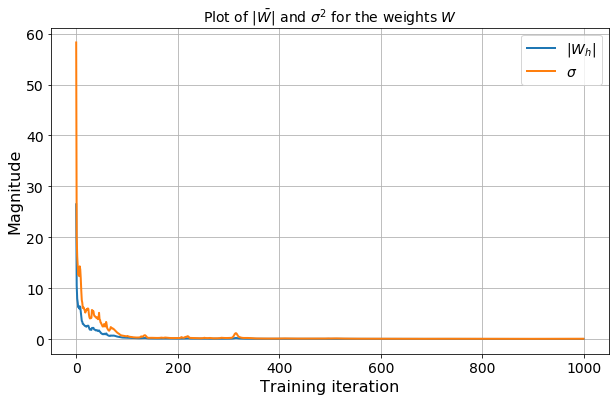

In [13]:
# Plot the gradient before, during and after training:
gradient_vector = np.asarray(gradient_vector).reshape(-1, 2)
fig, ax = plt.subplots(figsize=(10,6))
print(gradient_vector[:,0].shape)
ax.plot(gradient_vector[:,0], linewidth=2, label=r'$|W_h|$')
ax.plot(gradient_vector[:,1], linewidth=2,  label=r'$\sigma$')
ax.set_xlabel("Training iteration")
ax.set_ylabel("Magnitude")
plt.legend(loc='best')
plt.grid()
plt.title(r'Plot of $\bar{|W|}$ and $\sigma^2$ for the weights $W$')

Here we see a nice convergence. :)